Median Order of Products (sorted): ['etanolhidratado']


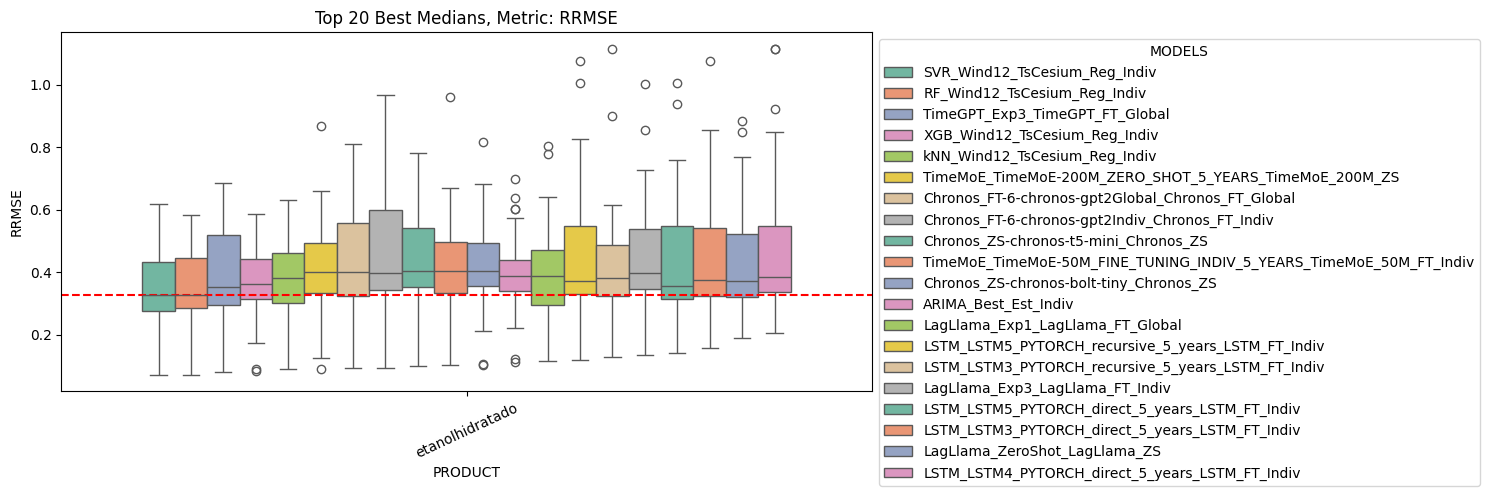

In [39]:
######## COMPARAÇÃO MODELOS TREINAMENTO ###########


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_csv("CISIA-ALL-Experiments.csv", header=0, sep=",", encoding="latin1")

###################################################################
# Select product
# data = data[data['PRODUCT'] != 'etanolhidratado']
data = data[data['PRODUCT'] != 'gasolinac']
data = data[data['PRODUCT'] != 'gasolinadeaviacao']
data = data[data['PRODUCT'] != 'glp']
data = data[data['PRODUCT'] != 'oleocombustivel']
data = data[data['PRODUCT'] != 'oleodiesel']
data = data[data['PRODUCT'] != 'querosenedeaviacao']
data = data[data['PRODUCT'] != 'queroseneiluminante']


# Define metric
metric = "RRMSE"

# Ensure metric column contains only numeric values
data = data[pd.to_numeric(data[metric], errors='coerce').notna()]
data[metric] = pd.to_numeric(data[metric], errors='coerce')

# Remove outliers using IQR method
Q1 = data[metric].quantile(0.25)
Q3 = data[metric].quantile(0.75)
IQR = Q3 - Q1
data = data[(data[metric] >= (Q1 - 1.5 * IQR)) & (data[metric] <= (Q3 + 1.5 * IQR))]

# Calculate the median for each group
grouped_data = data.groupby(['PRODUCT', 'INFO'])[metric].median().reset_index()

# Select the top 20 best (lowest) medians
top_20 = grouped_data.nsmallest(20, metric)

# Filter the original data to include only the selected top 20 groups
filtered_data = data.merge(top_20[['PRODUCT', 'INFO']], on=['PRODUCT', 'INFO'])

# Calculate the median for each PRODUCT
median_order = (
    filtered_data.groupby('PRODUCT')[metric]
    .median()
    .sort_values()
    .index.tolist()
)

# Ensure `PRODUCT` is ordered by median
filtered_data['PRODUCT'] = pd.Categorical(filtered_data['PRODUCT'], categories=median_order, ordered=True)

# Explicitly sort the filtered data for plotting
filtered_data = filtered_data.sort_values(by=["PRODUCT", metric])

# Plot
plt.figure(figsize=(15, 5))
sns.boxplot(
    x='PRODUCT', 
    y=metric, 
    hue='INFO', 
    data=filtered_data, 
    palette="Set2"
)
plt.xticks(rotation=25)
plt.title(f'Top 20 Best Medians, Metric: {metric}')
plt.ylabel(metric)
plt.xlabel('PRODUCT')
plt.axhline(y=top_20[metric].min(), color='red', linestyle='--')

plt.legend(title='MODELS', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
